In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_path = "D:\Essentials\Code\pizza_not_pizza\Train"
test_path = "D:\Essentials\Code\pizza_not_pizza\Test"
valid_path = r"D:\Essentials\Code\pizza_not_pizza\validation"

In [13]:
IDG = ImageDataGenerator(rescale = 1/255)

In [14]:
train = IDG.flow_from_directory(directory = train_path,
                                target_size = (224, 224), 
                                classes = ['not_pizza', 'pizza'],
                                batch_size = 10)
test = IDG.flow_from_directory(directory = test_path,
                                target_size = (224, 224), 
                                classes = ['not_pizza', 'pizza'],
                                batch_size = 10)
valid = IDG.flow_from_directory(directory = valid_path,
                                target_size = (224, 224), 
                                classes = ['not_pizza', 'pizza'],
                                batch_size = 10, shuffle = False)

Found 1324 images belonging to 2 classes.
Found 443 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


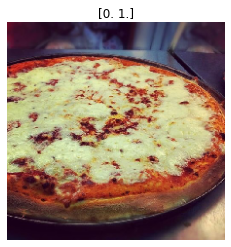

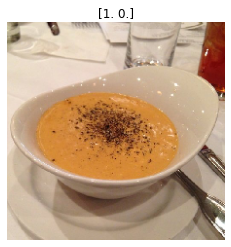

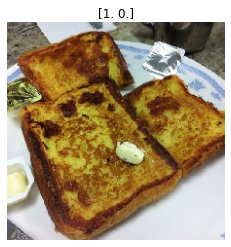

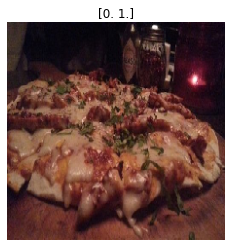

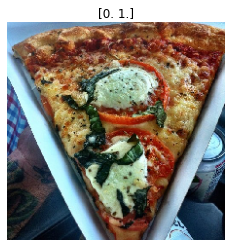

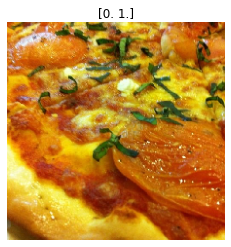

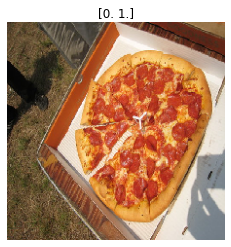

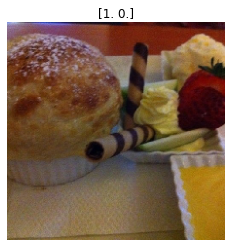

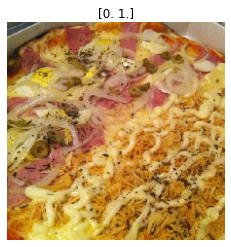

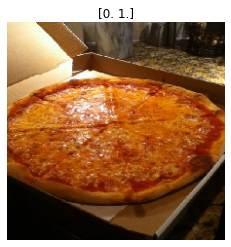

In [17]:
imgs, labels = test[4]

for i in range(10):
    image_path = imgs[i]
    label = labels[i]
    
    plt.imshow(image_path)
    plt.title(label)
    plt.axis('off')
    plt.show()

In [23]:
#create the model 
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)),
        MaxPool2D(pool_size = (2, 2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2), strides = 2),
        Flatten(),
        Dense(units = 2, activation = 'softmax')
])

In [25]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = train, validation_data = test, epochs = 15, verbose = 2)

Epoch 1/15
133/133 - 87s - loss: 0.6731 - accuracy: 0.6148 - val_loss: 0.5971 - val_accuracy: 0.6704 - 87s/epoch - 654ms/step
Epoch 2/15
133/133 - 60s - loss: 0.5659 - accuracy: 0.7077 - val_loss: 0.5674 - val_accuracy: 0.7269 - 60s/epoch - 452ms/step
Epoch 3/15
133/133 - 59s - loss: 0.5135 - accuracy: 0.7606 - val_loss: 0.5985 - val_accuracy: 0.6907 - 59s/epoch - 447ms/step
Epoch 4/15
133/133 - 61s - loss: 0.4312 - accuracy: 0.8127 - val_loss: 0.5408 - val_accuracy: 0.7607 - 61s/epoch - 457ms/step
Epoch 5/15
133/133 - 62s - loss: 0.3627 - accuracy: 0.8625 - val_loss: 0.5338 - val_accuracy: 0.7517 - 62s/epoch - 464ms/step
Epoch 6/15
133/133 - 60s - loss: 0.3233 - accuracy: 0.8829 - val_loss: 0.5389 - val_accuracy: 0.7336 - 60s/epoch - 453ms/step
Epoch 7/15
133/133 - 60s - loss: 0.2774 - accuracy: 0.9116 - val_loss: 0.5642 - val_accuracy: 0.7088 - 60s/epoch - 451ms/step
Epoch 8/15
133/133 - 60s - loss: 0.2299 - accuracy: 0.9373 - val_loss: 0.5452 - val_accuracy: 0.7517 - 60s/epoch - 451

In [27]:
#create the model 
model = Sequential([
        keras.layers.RandomFlip('horizontal'),
        keras.layers.RandomRotation(0.2),
        Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)),
        MaxPool2D(pool_size = (2, 2), strides = 2),
        keras.layers.Dropout(0.25),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2), strides = 2),
        keras.layers.Dropout(0.25),
        Flatten(),
        Dense(units = 2, activation = 'softmax')
])

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = train, validation_data = test, epochs = 15, verbose = 2)

Epoch 1/15
133/133 - 156s - loss: 0.6978 - accuracy: 0.5906 - val_loss: 0.6322 - val_accuracy: 0.6591 - 156s/epoch - 1s/step
Epoch 2/15
133/133 - 132s - loss: 0.6585 - accuracy: 0.6231 - val_loss: 0.6457 - val_accuracy: 0.6727 - 132s/epoch - 991ms/step
Epoch 3/15
133/133 - 74s - loss: 0.6259 - accuracy: 0.6435 - val_loss: 0.6274 - val_accuracy: 0.6840 - 74s/epoch - 555ms/step
Epoch 4/15
133/133 - 72s - loss: 0.6164 - accuracy: 0.6684 - val_loss: 0.6086 - val_accuracy: 0.7201 - 72s/epoch - 538ms/step
Epoch 5/15
133/133 - 71s - loss: 0.6039 - accuracy: 0.6699 - val_loss: 0.6199 - val_accuracy: 0.6840 - 71s/epoch - 535ms/step
Epoch 6/15
133/133 - 72s - loss: 0.5840 - accuracy: 0.6805 - val_loss: 0.5878 - val_accuracy: 0.7359 - 72s/epoch - 539ms/step
Epoch 7/15
133/133 - 72s - loss: 0.5736 - accuracy: 0.7054 - val_loss: 0.5863 - val_accuracy: 0.7246 - 72s/epoch - 540ms/step
Epoch 8/15
133/133 - 71s - loss: 0.5649 - accuracy: 0.7130 - val_loss: 0.6023 - val_accuracy: 0.7291 - 71s/epoch - 53